### Ремизов Дмитрий А-05-20
# ЛАБОРАТОРНАЯ РАБОТА №4 <br> <br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Задача 4.1**

Приведены данные о численности населения некоторых крупнейших стран мира по годам с $1950$ -$2000$ г.г. Заполнить последние два столбца таблицы (взять сведения из интернета).  На основе этих данных для конкретного варианта построить наилучший многочлен  по МНК.  Найти численность  населения страны  в $2019$ году  и сравнить полученное значение  с актуальным значением  (взять из интернета).
Решить ту же  задачу на основе интерполяционного многочлена.  То есть построить интерполяционный многочлен по значениям с $1950$-$2020$ г.г. Вычислить значение  для $2019$ года и сравнить с актуальными данными.  Составить отчет по задаче.

Создаем массивы данных населения Южной Африки в соответствующие года

In [2]:
SAR = [155, 210, 285, 375, 510, 650, 770, 860]
Years = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

Для решения задачи методом наименьших квадратов реализуем функции расчета сумм $S_i$ и $B_i$. Так же реализуем функцию решения СЛАУ полученной из вычисленных коэффициентов.

In [3]:
def SInput(years):
    n = 8
    s = [0]*(n*2 - 1)
    for i in range(n*2 - 1):
        for j in range(n):
            s[i] = s[i] + years[j]**i
    return s

def BInput(years, people):
    n = 8
    b = [0] * n
    for i in range(n):
        for j in range(n):
            b[i] = b[i] + people[j]*(years[j])**i
    return b

def MNK(s, b, n):
    a = [0] * n
    y = [0] * n
    A = [ [0]*n for i in range(n) ]
    for i in range(n):
        for j in range(n):
            A[i][j] = s[i + j]
    for k in range(n - 1):
        for i in range(k + 1, n):
            mu = A[i][k]/A[k][k]
            for j in range(k, n):
                A[i][j] = A[i][j] - mu*A[k][j]
            A[i][k] = mu
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] = y[i] - y[j] * A[i][j]
    for i in range(n - 1, -1 , -1):
        a[i] = y[i]/A[i][i]
        for j in range(n - 1, i, -1):
            a[i] = a[i] - (a[j] * A[i][j] / A[i][i])
    return a

Вычисляем коэффициенты многочлена

In [4]:
s = SInput(Years)
b = BInput(Years, SAR)
a = MNK(s, b, 8)
print(a)

[-66098168.547607824, 35403.28853307187, 45.98756620068738, -0.023062905565889608, -1.0627560471387064e-05, 3.2272966391951075e-09, 2.494725323497866e-12, -7.582010070271443e-16]


Функция расчета населения в заданном году для данных коэффициентов

In [5]:
def FindPeople(a, year, n):
    people = 0
    for i in range(n):
        people = people + a[i] * year**i
    return people

FindPeople(a, 2019, 8)

853.8057630807161

Население Южной Африке в 2019 году составило 853 млн. Функция нашла ответ довольно точно <br> <br>
Надем наилучий многочлен МНК с помощью погрешность. Выберем тот многочлен, который выдает наименьшую погрешность

In [6]:
def Pogr(people, years):
    n = 8
    q = [0] * n
    for i in range(n):
        a = MNK(s, b, i)
        for j in range(n):
            q[i] = q[i] + (people[j] - FindPeople(a, years[j], i))**2
        q[i] = np.sqrt(q[i]/n)
    MinPogr = q[0]
    IndexOfMin = 0
    print(q)
    for i in range(n):
        if MinPogr > q[i]:
            MinPogr = q[i]
            IndexOfMin = i
    return IndexOfMin

Pogr(SAR, Years)

[536.7814965141775, 246.42363801997567, 30.407084270109223, 19.510852444098365, 7.642495550912246, 7.119913535386948, 20.955544773307015, 8.573422340452828]


5

Многочлен пятой степени - наилучший

In [7]:
n = 5
a = MNK(s, b, n)
for i in range(n):
    print(FindPeople(a, Years[i], n), "--" , SAR[i])

print('\n')    
FindPeople(a, 2019, 5)

160.37474656105042 -- 155
200.395102314651 -- 210
279.8296252563596 -- 285
388.07146394252777 -- 375
513.5623080283403 -- 510




855.308028653264

Функция интерполяции

In [8]:
def Inter(people, years, n):
    a = [0] * n
    y = [0] * n
    A = [ [0]*n for i in range(n) ]
    for i in range(n):
        for j in range(n):
            A[i][j] = (years[i])**j
    for k in range(n - 1):
        for i in range(k + 1, n):
            mu = A[i][k]/A[k][k]
            for j in range(k, n):
                A[i][j] = A[i][j] - mu*A[k][j]
            A[i][k] = mu
    for i in range(n):
        y[i] = people[i]
        for j in range(i):
            y[i] = y[i] - y[j] * A[i][j]
    for i in range(n - 1, -1 , -1):
        a[i] = y[i]/A[i][i]
        for j in range(n - 1, i, -1):
            a[i] = a[i] - (a[j] * A[i][j] / A[i][i])
    return a

a = Inter(SAR, Years, 8)
print(a, '\n')

FindPeople(a, 2019, 8)

[638236348983136.0, -2248892331742.508, 3395995243.1741886, -2848925.2927274853, 1433.9512924629298, -0.43303909660253675, 7.264997165850594e-05, -5.223422583159556e-09] 



857.0

**ВЫВОД: Многочлены МНК и интерполяции позволяют довольно точно находить зависимость между двумя переменными основываясь на небольшом объеме данных.**

**Задача 4.2**

Дана функция $y = f(x)$ . Приблизить функцию  методом интерполяции, используя многочлен Лагранжа. Степень многочлена $N$ подобрать таким образом, чтобы максимальная величина погрешности на отрезке $[a, b]$ не превышала заданной величины $e$. Построить графики многочленов и графики погрешностей .Приблизить функцию  методом интерполяции, указанным в  индивидуальном варианте. Сравнить полученные результаты. 

$y = \frac{cos(3x)}{x}$ <br><br>
Вносим данные: $[a, b] = [2, 4]$, $e = 0.005$. Так же реализуем функцию расчета значений функции в тачках данного разбиения.

In [9]:
n = 10
m = n + 1
eps = 0.005
a = 2
b = 4
ba = b - a
def XY(n):
    otr = ba / n
    X = [0] * m
    for i in range(m):
        X[i] = 3 + i*otr
    Y = [0]*m
    for i in range(m):
        Y[i] = F(X[i])
    return X, Y

def F(x):
    return x**(-1) * np.cos(3*x)
X, Y = XY(n)

Результаты вносим в таблицу:

In [10]:
T1 = pd.DataFrame({'x' : X, 'y' : Y})
T1

,x,y
0,3.0,-0.303710
1,3.2,-0.307715
2,3.4,-0.210078
3,3.6,-0.053981
4,3.8,0.103550
5,4.0,0.210963
6,4.2,0.237961
7,4.4,0.183155
8,4.6,0.071916
9,4.8,-0.054129


Разбираемся с многочленом Лагранжа. Реализуем расчетную функцию.<br>
Подберем степень многочлена, чтобы погрешность удовлетворяла eps

In [11]:
def LAGR(xn,yn,t):
    sum=0
    for j in range(len(yn)):
        p1=1; p2=1
        for i in range(len(xn)):
            if i==j:
                p1=p1*1; p2=p2*1   
            else: 
                p1=p1*(t-xn[i])
                p2=p2*(xn[j]-xn[i])
        sum += yn[j]*p1/p2
    return sum

def F(x):
    return np.cos(3*x) / x

def poisk():
    i = 0
    x1 = np.linspace(2, 4, 100)
    y1 = [F(i) for i in x1]
    eps = 0.001
    x2 = np.linspace(2, 4, 100)
    while (abs(F(i) - LAGR(x1,y1,i)) >= eps):
        x1 = np.linspace(2, 4, 100)
        y1 = [F(i) for i in x1]
        i += 1
    return i
          
print("Степень многочлена, удовлетворяющая погрешности = ", poisk())

Степень многочлена, удовлетворяющая погрешности =  2


C:\Users\DD69~1\AppData\Local\Temp/ipykernel_25372/248922654.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  return np.cos(3*x) / x


Погрешность многочлена Лагранжа

In [12]:
def poisk3():
    x3 = np.linspace(2, 4, 100)
    y3 = [F(i) for i in x3]
    ans = [abs(F(i) - LAGR(x3, y3, i)) for i in x3]
    return ans

print("Погрешности в узлах = ", poisk3())

Погрешности в узлах =  [0.0, 0.0, 0.0, 5.551115123125783e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7755575615628914e-17, 2.7755575615628914e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 6.938893903907228e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3877787807814457e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7755575615628914e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7755575615628914e-17, 0.0, 2.7755575615628914e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3877787807814457e-17, 0.0, 1.3877787807814457e-17, 0.0, 6.938893903907228e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3877787807814457e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7755575615628914e-17, 0.0, 0.0]


Разбираемся с Крвадратичным сплайном с дополнительным условием $y'(a) = f'(a)$. Реализуем расчетную функцию, возвращающую матрицу коэффициентов, функцию расчета значения многочлена в данной точке, и функцию расчета погрешности

In [13]:
x2 = np.linspace(2, 4, 100)

def F_proizv(x):
    return (-np.sin(x)*x+np.cos(x))/x**2

def Spline(x, y):
    buf = []
    A = np.zeros((3,3))
    b = np.zeros(3)
    for i in range(len(x) - 1):
        for j in range(3):
            A[0][j] = x[i]**(2-j)
            A[1][j] = x[i+1]**(2-j)
        A[2][0] = 2 * x[i]
        A[2][1] = 1
        b[0] = y[i]
        b[1] = y[i+1]
        if i == 0:
            b[2] = F_proizv(x[0])
        else:
            b[2] = 2 * buf[i-1][0] * x[i] + buf[i-1][1]
        buf.append(np.linalg.solve(A, b))
    return buf

def solve(t, spl):
    ans = 0
    for i in range(len(x2) - 1):
        if (t >= x2[i] and t <= x2[i+1]):
            ans = spl[i][0] * t**2 + spl[i][1] * t + spl[i][2]
    return ans
        
def poisk2():
    x2 = np.linspace(2, 4, 100)
    y2 = [F(i) for i in x2]
    spl = Spline(x2,y2)
    ans = [abs(F(i) - solve(i, spl)) for i in x2]
    return ans
                   
print("Погрешность в каждом узле = ", poisk2())


Погрешность в каждом узле =  [1.482147737874584e-14, 1.3322676295501878e-15, 1.0935696792557792e-14, 2.4424906541753444e-15, 1.0269562977782698e-14, 7.66053886991358e-15, 1.815214645262131e-14, 2.603472992745992e-14, 2.3814283878209608e-14, 6.439293542825908e-15, 2.1371793224034263e-14, 5.856426454897701e-14, 1.1102230246251565e-16, 1.326716514427062e-14, 5.162537064506978e-15, 2.325917236589703e-14, 2.2037927038809357e-14, 2.919886554764162e-14, 3.1807889655510735e-14, 8.1601392309949e-15, 1.0907941216942163e-14, 1.7208456881689926e-15, 2.4924506902834764e-14, 5.5289106626332796e-14, 5.498379529456088e-14, 3.4916514124461173e-14, 1.5709655798445965e-14, 5.523359547510154e-14, 2.7824964554667986e-15, 5.495603971894525e-14, 3.008183979691381e-14, 2.7868332641567406e-14, 1.7819079545233762e-14, 1.3079815008865125e-14, 5.7870375158586285e-15, 4.6351811278100286e-15, 4.489464355827977e-14, 6.711298183859071e-14, 2.245426067304379e-14, 3.502753642692369e-14, 8.537615059367454e-14, 1.8485213

Графики погрешностей

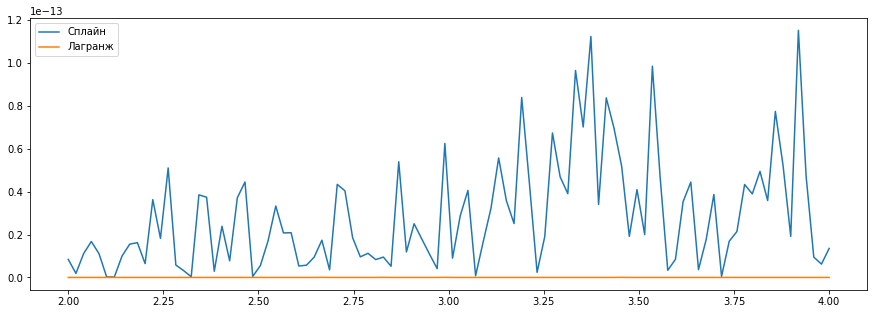

In [25]:
err = poisk2()
err_l = poisk3()
length = np.linspace(2, 4, 100)
fig, axs = plt.subplots(1,1, figsize = (15,5))
axs.plot(length, err, label = "Сплайн")
axs.plot(length, err_l, label = "Лагранж")
axs.legend()

Составим графики нашей функции и двух многочленов

[0.480085143325183, 0.48278901125254814, 0.483684102619588, 0.48280298194652244, 0.48018334416739666, 0.4758678190321254, 0.4699037634647038, 0.46234304257344877, 0.4532418000411507, 0.4426602186524, 0.43066227174207233, 0.41731546637293887, 0.40269057907156036, 0.38686138497000494, 0.36990438121645236, 0.35189850553038066, 0.33292485078778283, 0.3130663765286962, 0.29240761828328116, 0.27103439561370485, 0.2490335197672839, 0.22649250183164496, 0.2034992622751837, 0.18014184274582434, 0.15650812098812325, 0.1326855297231126, 0.1087607803170429, 0.0848195920444555, 0.06094642772783054, 0.0372242365105232, 0.013734204491951845, -0.009444486075920524, -0.032234888363728176, -0.05456251267823007, -0.07635553771667115, -0.09754501080175722, -0.11806503657591123, -0.13785295367376765, -0.15684949893344566, -0.17499895874980304, -0.19224930721659905, -0.2085523307489822, -0.22386373892295128, -0.23814326131418392, -0.25135473016478943, -0.26346614875290164, -0.27444974538653816, -0.284282012

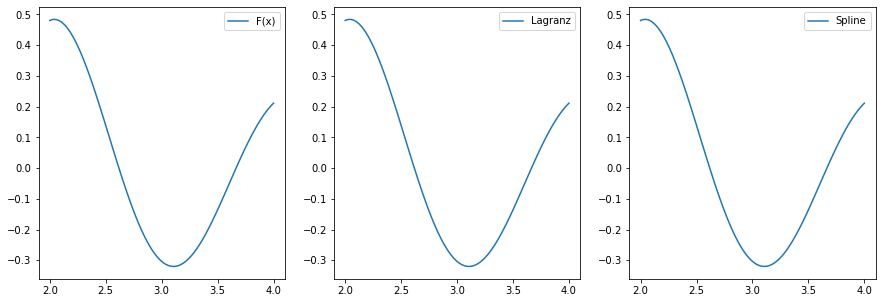

In [15]:
a1 = np.linspace(2, 4, 100)
z1 = [F(i) for i in a1]
z2 = []
for i in a1:
    z2.append(LAGR(a1, z1, i))
spl2 = Spline(a1, z1)
z3 = [solve(i, spl2) for i in a1]
fig, axs = plt.subplots(1,3, figsize = (15,5))
print(z2)
axs[0].plot(a1, z1, label="F(x)")
axs[1].plot(a1, z2, label="Lagranz")
axs[2].plot(a1, z3, label="Spline")
axs[0].legend()
axs[1].legend()
axs[2].legend()

Т.к. графики совпадают
### ВЫВОД: интерполирующие многочлены находят точное значение в заданных точках разбиения, но на отрезках разбиения может быть погрешность. Погрешности Лагранжа и сплайна минимальны

**Задача 4.3**

Задана функция $f(x)$, определенная на отрезке $[-1;1]$. Требуется разложить функцию в ряд Тейлора в окрестности нуля с точностью $e$ и произвести экономизацию полученного степенного ряда. <br><br>
$F(x) = x^2e^{-x}$

**F(x) - исходная функция, F_coef(i) - коэфиициэнт i-го элемента в разложении Тейлора, S(x, c) - сумма n членов ряда по коэффициенту c_n**

In [16]:
import math
a = -1
b = 1
cnt = 100
x = np.linspace(a, b, cnt)

def F(x):
    return x**2*np.exp(-x)

def F_coef(i):
    return 1/ math.factorial(i)

def S(x, c):
    sum = 0
    for i in range(len(c)):
        sum += x**2*((-x)**i) * F_coef(i)
    return sum

Массив коэффициентов

In [17]:
def mas_coef(n):
    mas = []
    for i in range(n):
        mas.append(F_coef(i))
    return mas

p = mas_coef(4)

Пусть eps = 10^(-5). Функция асс(х) определяет требуемое количество слагаемых для достижения требуемой точности

In [18]:
def acc(x, p):
    eps = 10**(-5)
    i = 0
    while abs(S(x[i], p) - F(x[i])) >= eps:
        i += 1
    return i

z = acc(x, p)
print("Требуемое кол-во слагаемых для достижения заданной точности = ", z)

Требуемое кол-во слагаемых для достижения заданной точности =  38


Графики исходной функции и суммы ряда Тейлора n членов

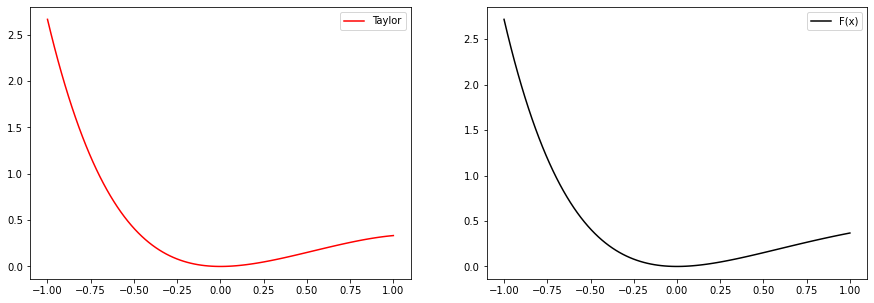

In [19]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
axs[0].plot(x, S(x, p), label="Taylor", color="red")
axs[1].plot(x, F(x), label="F(x)", color="black")
axs[0].legend()
axs[1].legend()

## Экономизация степенного ряда

$x^6 = 1/32*(148x^4-18x^2+1+T_6)$

In [20]:
p[0] += 1/(32*math.factorial(7))
p[1] -= 18/(32*math.factorial(7))
p[2] += 148/(32*math.factorial(7))
p[3] = 0

График погрешности экономизации

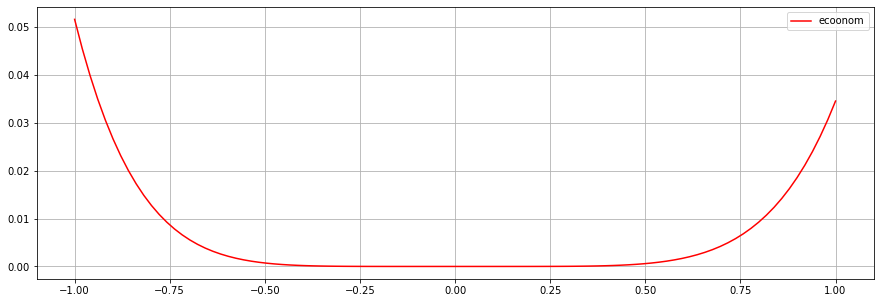

In [21]:
fig, axs = plt.subplots(1,1, figsize = (15,5))
axs.plot(x,np.abs(F(x) - S(x,p)), color ='r', label = 'ecoonom')
axs.grid()
axs.legend()

### Вывод: после уменьшения количества слагаемых на 1, необходимая точность не сохраняется, а значит ряд нельзя сократить с сохранением первоначальной точности